In [1]:
%matplotlib notebook

In [2]:
from genelifeNd import *
import genelifed_update_module as genelife


## Python-C link:

Build genlife scheme with xcode using ../fastgenegol.xcodeproj/
Then
```
ln -s ../Build/Products/Release/libgenelife.dylib libgenelife.dylib
```
and
```
ln -s ../Build/Products/Release/libgenelifed.dylib libgenelifed.dylib
```

**Careful:**  make sure that Xcode is setup to compile inot the Release directory.  (Could be set to Debug directory, in which cased the links would have to change.


Then
```
python genelife.py
```

#### Changing lattice size:
Change `log2N`:
* line 23 in `subgene4d.c`, 
* line 10 in `genelifeNd.py`.

#### Variation by NP for gathering stats:
display ndisp, run for nrun without display, repeat:
|---ndisp---|------------------nrun---------------|
e.g. ndisp=100, nrun = 1000

python genelifeN.py

## Deterministic vs. nondeterministic code:

`genelife.ipynb` uses deterministic code.

`genelifed.ipynb` uses non-deterministic code.

`genelifed.ipynb` may be switched to non-deterministic by changing line 356 of `subgenelife4d.c` (to call either `update_nondet()` or `update_det()`), recompiling, and restarting the python kernel. A future commit can set this as a configuration parameter... Note however that non deterministic action is erroneous in update_nondet, and achievable instead with update_det (now just update) by means of the repscheme == 0 option.


## Older, pre-python C link:

Activity graph:
```
cc -o actgenegol actgenegol.c

acitivity.py actgenegol
```

## Dynamics:

default: display 200; iterate 1000; repeat

```
cc -o dispgenegol dispgenegol.c

display.py dispgenegol
```

## Jupyter notebook

In the current directory ruyn `jupyter notebook`, then in the browser window that pops up look for `genelife.ipynb` and open it.  Execute cells down to the *Animation* section, and watch the animation.




In [3]:
offsets = [[0,0,0],
       [-1, 0, 0],
       [-1, 1, 0],
       [0, 1, 0],
       [1, 1, 0],
       [1, 0, 0],
       [1, -1, 0],
       [0, -1, 0],
       [-1, -1, 0]]
numHis = pow(2,len(offsets))
histo=np.zeros(numHis,np.uint64)

simparams = np.zeros(5,np.int32)    # 5 parameters passed to C
nlog2p0   = simparams[0] = 8
nlog2pmut = simparams[1] = 8
selection = simparams[2] =  1            # values 0,1,2 allowed
rule2mod  = simparams[3] =  1            # values 0,1 allowed
initial1density = simparams[4] = 16384   # nearest to half of guaranteed C rand max value 32767 = 2**15 - 1


In [4]:
cgrid.shape

(256, 256)

<IPython.core.display.Javascript object>


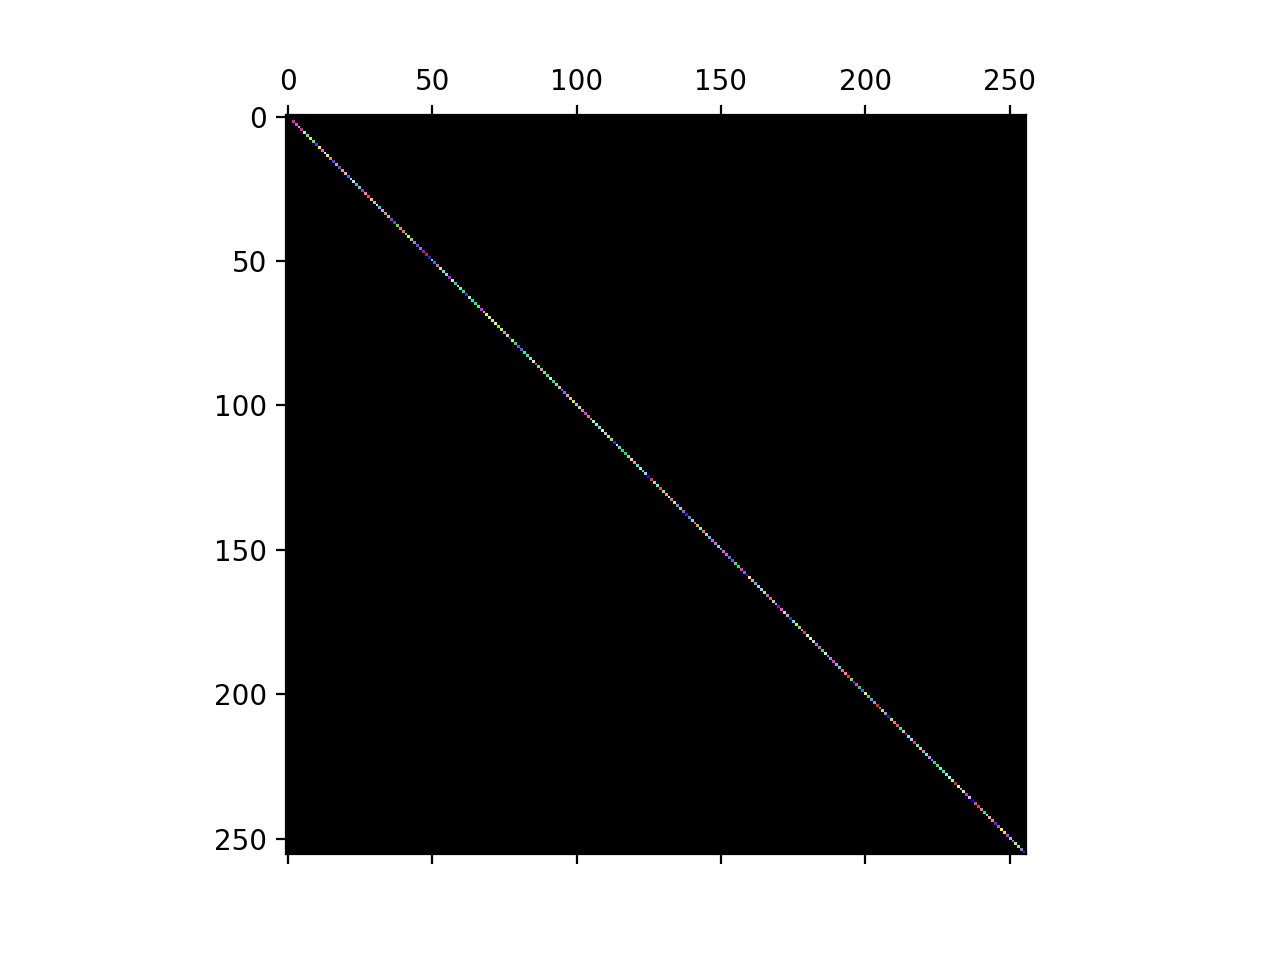

In [5]:
fig, ax = plt.subplots()
for i in range(256):
    cgrid[i,i] = i
mat = ax.matshow(cgrid, cmap=my_cmap, vmin=0.01, vmax=257)  # was vmax = LEN+1
plt.show()

In [6]:
log2N

8

In [7]:
flatoff =  [x for sublist in offsets for x in sublist]
npoffsets = np.array(flatoff,np.int32)
genelife.initialize_planes(npoffsets)

genelife.initialize(simparams)

genelife.initialize_genes(simparams)

In [8]:
int(3)

3

In [9]:
genelife.get_curgol(gol)

In [10]:
cgrid.shape

(256, 256)

In [11]:
gol

array([1, 1, 1, ..., 0, 0, 0], dtype=uint64)

## Animation

<IPython.core.display.Javascript object>


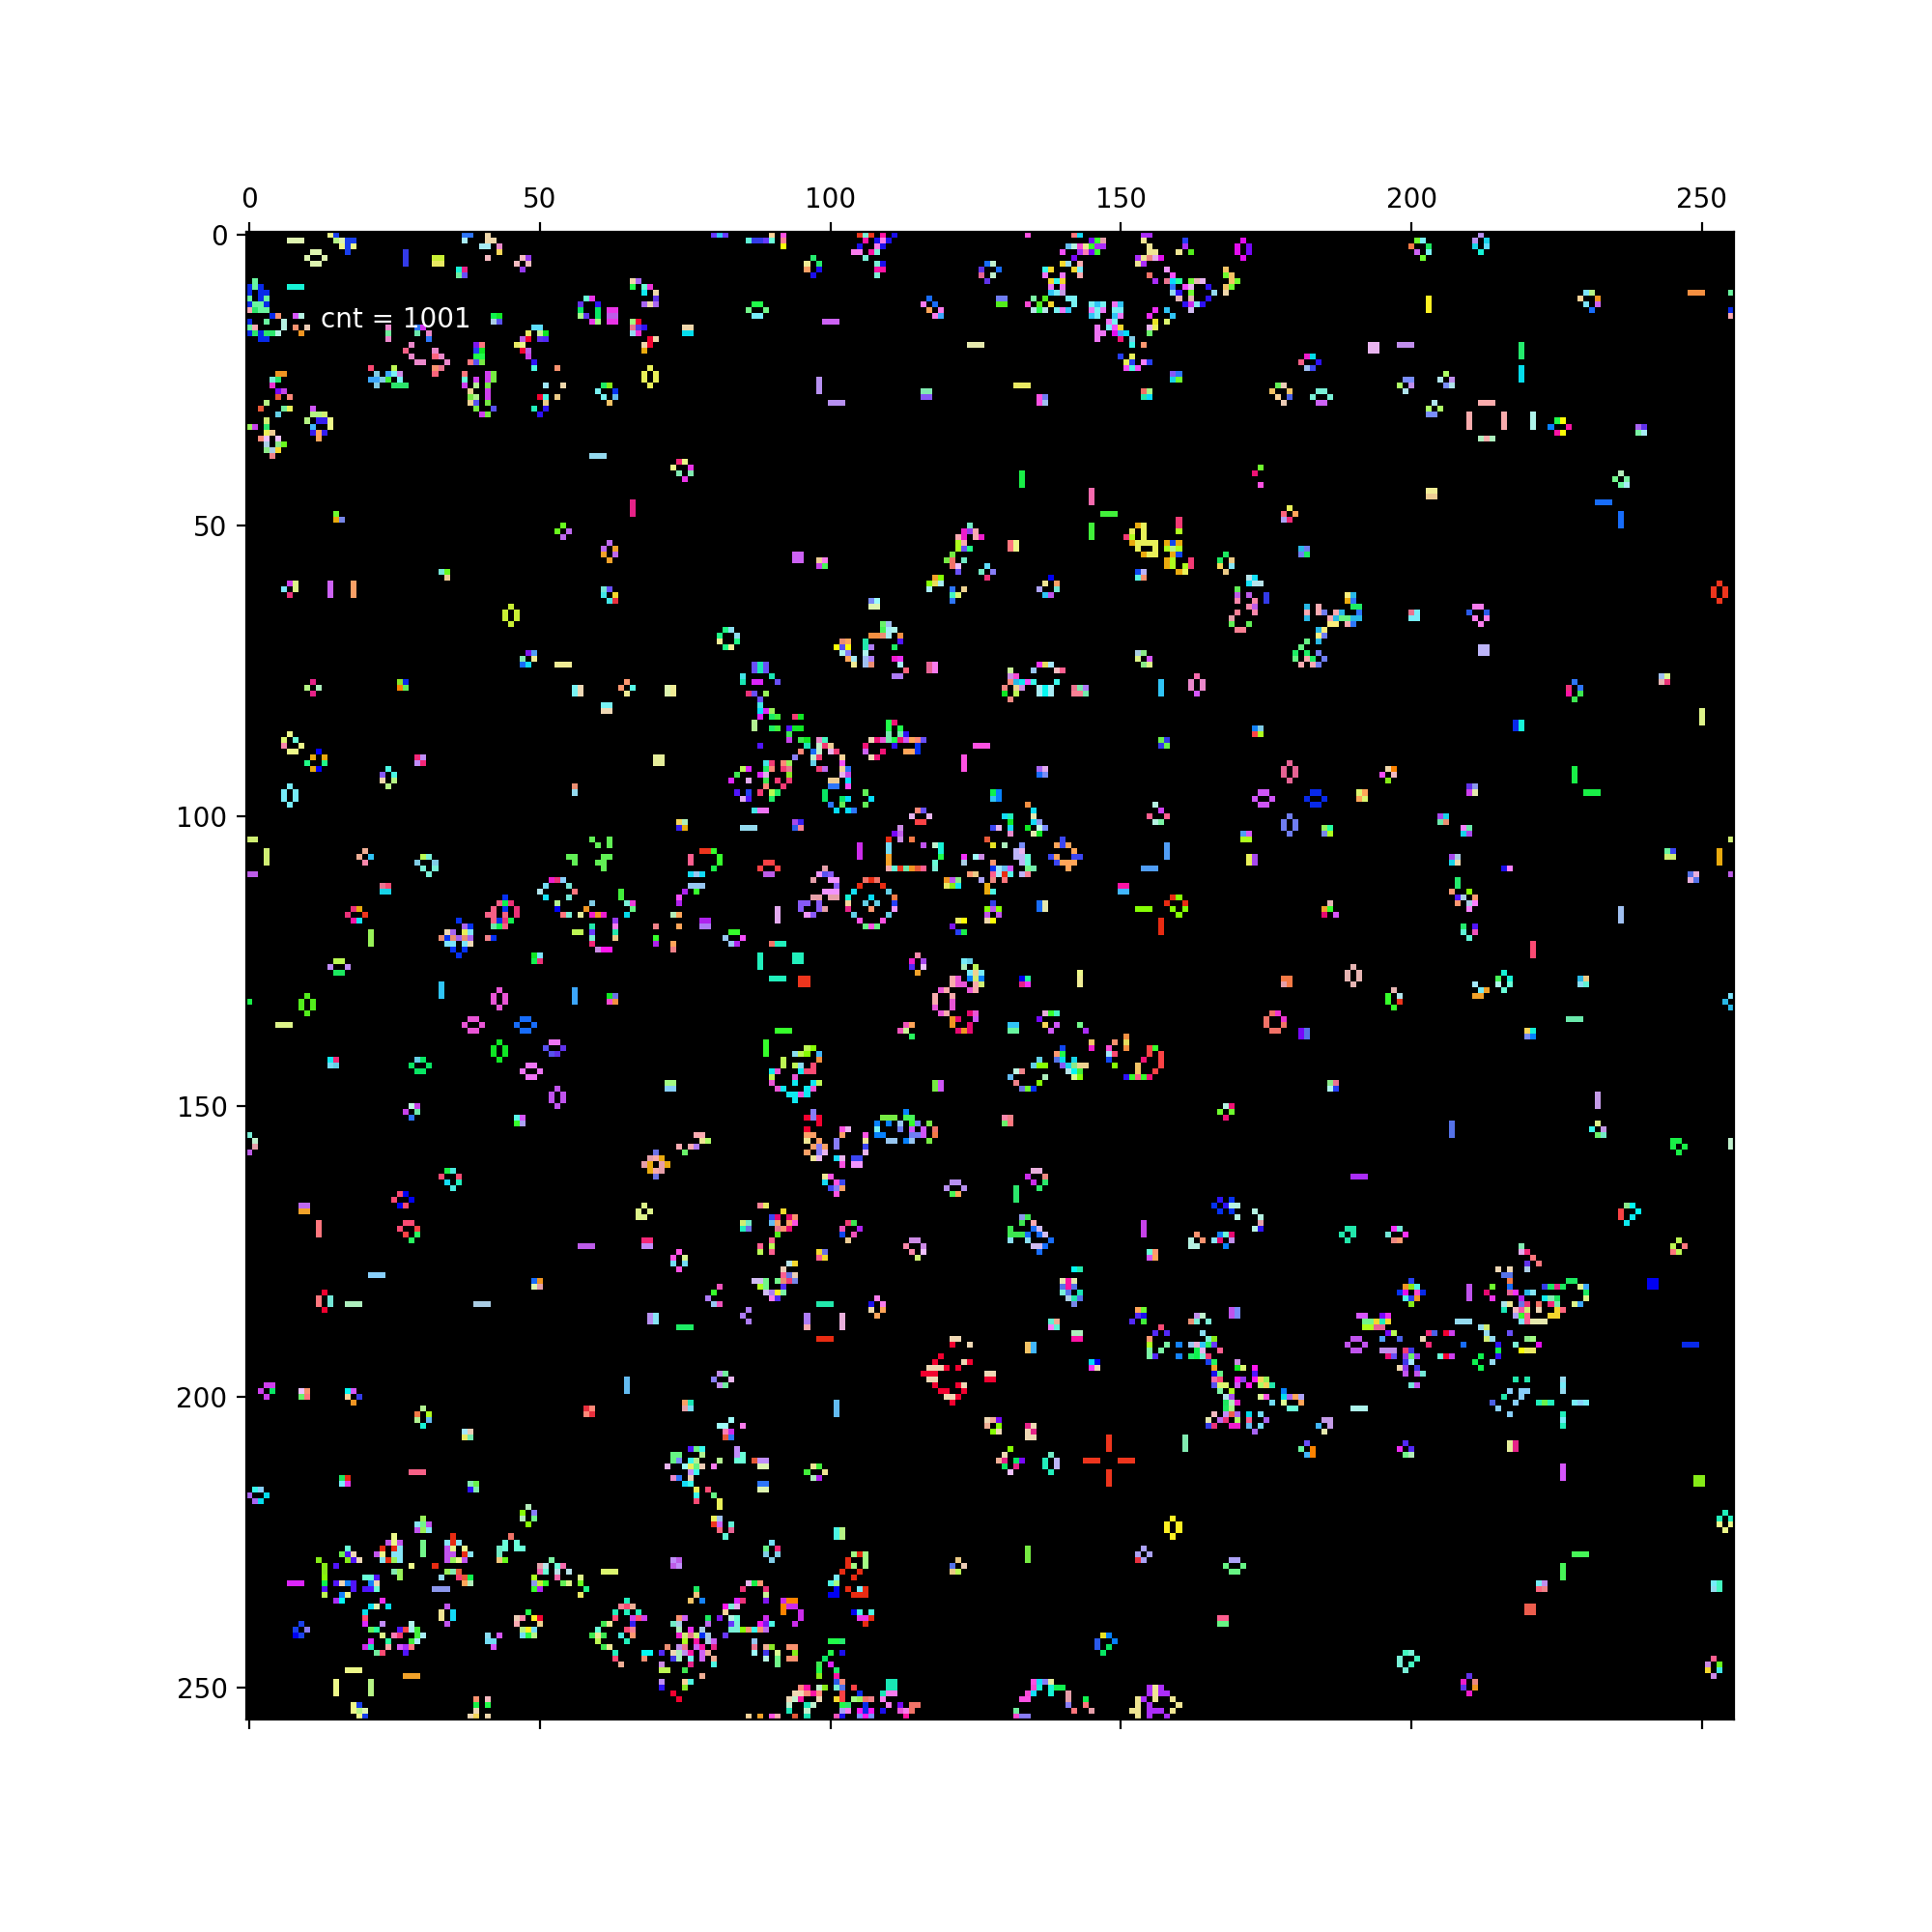

In [12]:
#def doanimation(nrun=1,ndisp=1000,niter=1):    
nrun=1; ndisp=1000; niter=1
fig, ax = plt.subplots(figsize=(10,10))

time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes)
colorgrid(N)
def update_anim(data):
    global gol, cgrid
    global golg
    global log2N
    global simparams
    global cnt
    global framenr
    global mat
    cnt = cnt+1
    #if cnt % ndisp == 0:  # insert the non-displayed iterations
    genelife.genelife_update(gol, golg, log2N, nrun, simparams,0)
    framenr = framenr+nrun
    genelife.genelife_update(gol, golg, log2N, 1, simparams,0)
    colorgrid(N)
    mat.set_data(cgrid)
    time_text.set_text('cnt = %.1d' % framenr)
    time_text.set_color('w')
    return mat

mat = ax.matshow(cgrid, cmap=my_cmap, vmin=0.01, vmax=257)  # was vmax = LEN+1
ani = animation.FuncAnimation(fig, update_anim, interval=1,
                              save_count=0, frames=niter*ndisp, repeat = False)
plt.show()


In [16]:
[histo[i] for i in [x+128 for x in range(256)]]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
